In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:
np.random.seed(123)
nsample = 20
x1 = np.linspace(0, 20, nsample)
x2 = np.sqrt(x1)
X = np.column_stack((x1, x2))

In [14]:
X = sm.add_constant(X)

In [15]:
#b0 b1 b2 coeff
beta = [2, 0.5, 10]

# random error
e = np.random.normal(size=nsample)

#linear equation
y = np.dot(X, beta) + e

In [16]:
sample_df = pd.DataFrame({"y":y, "x1":x1, "x2":x2})
sample_df.head()

,y,x1,x2
0,0.914369,0.000000,0.000000
1,13.783445,1.052632,1.025978
2,17.845135,2.105263,1.450953
3,19.843119,3.157895,1.777047
4,24.046230,4.210526,2.051957


In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(sample_df["y"], sample_df["x1"], sample_df["x2"],)
plt.show()

<Figure size 640x480 with 0 Axes>

In [27]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1530.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           6.45e-20
Time:                        16:39:26   Log-Likelihood:                -30.842
No. Observations:                  20   AIC:                             67.68
Df Residuals:                      17   BIC:                             70.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7387      1.081      1.609      0.1

In [28]:
res.params

array([1.73872906, 0.64307073, 9.6404141 ])

# OLS for Non-Linear Curve but Linear in Parameters

In [35]:
np.random.seed(123)
nsample = 20
x1 = np.linspace(1, 20, nsample)
x2 = x1**2
x3 = x1**3

X = np.column_stack((x1, x2, x3))
X = sm.add_constant(X)

beta = [5, 0.5, 0.5, -0.02]
e = np.random.normal(size=nsample)

y = np.dot(X, beta) + e

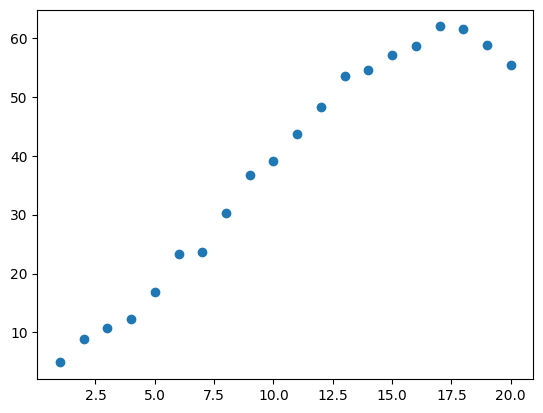

In [36]:
plt.scatter(x1, y)

In [37]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1633.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):           4.20e-20
Time:                        16:45:13   Log-Likelihood:                -30.485
No. Observations:                  20   AIC:                             68.97
Df Residuals:                      16   BIC:                             72.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0487      1.357      3.721      0.0

In [38]:
res.params

array([ 5.04867422,  0.33157831,  0.51741327, -0.02030142])

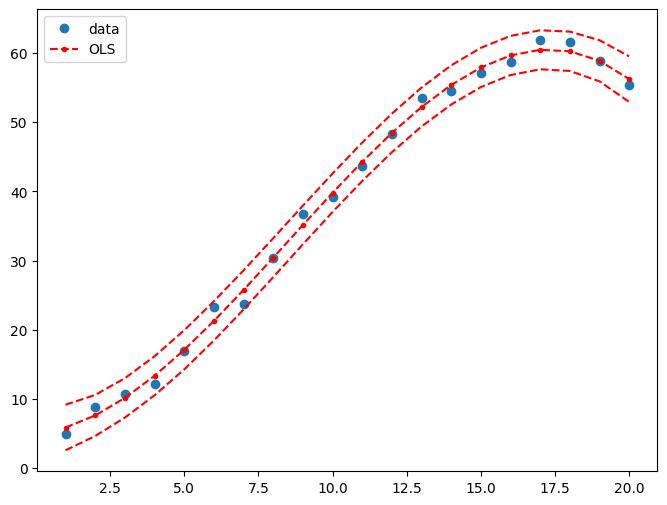

In [45]:
pred_ols = res.get_prediction()

# Extract confidence intervals
summary_frame = pred_ols.summary_frame()
iv_l = summary_frame["obs_ci_lower"]
iv_u = summary_frame["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x1, y, 'o', label="data")

ax.plot(x1, res.fittedvalues, 'r--.', label="OLS")

ax.plot(x1, iv_u, 'r--')
ax.plot(x1, iv_l, 'r--')

ax.legend(loc='best')
plt.show()